In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [29]:
# Importing the Dataset gotten from Kaggle
DataFrame = pd.read_csv(r"Commercial_Sales_Product.csv")

In [30]:
# Giving our dataset a vaiable name
df =pd.DataFrame(DataFrame)
df

,Date,Customer_ID,Product_ID,Quantity,Unit_Price,Sales_Revenue,Product_Description,Product_Category,Product_Line,Raw_Material,Region,Latitude,Longitude
0,20210601,98,321,1,117.306016,117.306016,Cycling Jerseys,Sports,Tops,Fabrics,York,53.958332,-1.080278
1,20210602,92,261,4,32.272403,129.089613,Casual Shirts,Menswear,Tops,Cotton,Worcester,52.192001,-2.220000
2,20210603,92,264,1,36.193364,36.193364,Casual Shirts,Menswear,Tops,Cotton,Worcester,52.192001,-2.220000
3,20210604,99,251,3,29.913403,89.740210,Jeans,Menswear,Trousers,Cotton,Winchester,51.063202,-1.308000
4,20210605,66,251,1,41.843430,41.843430,Shorts,Womenswear,Trousers,Cotton,Winchester,51.063202,-1.308000
5,20210606,97,304,3,49.887524,149.662573,Belts,Accessories,Leathers,Leather,Wells,51.209000,-2.647000
6,20210607,45,357,2,35.416016,70.832032,Ties,Accessories,Tops,Leather,Wakefield,53.680000,-1.490000
7,20210608,81,258,1,29.084205,29.084205,Polo Shirts,Menswear,Tops,Cotton,Wakefield,53.680000,-1.490000
8,20210609,47,260,3,44.498077,133.494232,Tshirts,Womenswear,Tops,Cotton,Wakefield,53.680000,-1.490000
9,20210610,24,263,3,38.497397,115.492191,Formal Shirts,Womenswear,Tops,Wool,Winchester,51.063202,-1.308000


# General cleaning of the dataset (Process)

In [4]:
# Checking the types of data I am working with
df.dtypes

Date                     int64
Customer_ID              int64
Product_ID               int64
Quantity                 int64
Unit_Price             float64
Sales_Revenue          float64
Product_Description     object
Product_Category        object
Product_Line            object
Raw_Material            object
Region                  object
Latitude               float64
Longitude              float64
dtype: object

In [5]:
# Checking the dataset for null values
df.isnull().sum()

Date                   0
Customer_ID            0
Product_ID             0
Quantity               0
Unit_Price             0
Sales_Revenue          0
Product_Description    0
Product_Category       0
Product_Line           0
Raw_Material           0
Region                 0
Latitude               0
Longitude              0
dtype: int64

In [6]:
# Checking for duplicate values
df.duplicated().sum()

0

In [7]:
# From the datatype, I discovered that the date/time is not in the right format
# Therefore, converting the date/time to the required or necessary format
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
# Calling out the variable to see if it has been effected
df.dtypes

Date                   datetime64[ns]
Customer_ID                     int64
Product_ID                      int64
Quantity                        int64
Unit_Price                    float64
Sales_Revenue                 float64
Product_Description            object
Product_Category               object
Product_Line                   object
Raw_Material                   object
Region                         object
Latitude                      float64
Longitude                     float64
dtype: object

# Expanding our date/time

In [9]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day_name()

In [10]:
df.head()

,Date,Customer_ID,Product_ID,Quantity,Unit_Price,Sales_Revenue,Product_Description,Product_Category,Product_Line,Raw_Material,Region,Latitude,Longitude,Year,Month,Day
0,1970-01-01 00:00:00.020210601,98,321,1,117.306016,117.306016,Cycling Jerseys,Sports,Tops,Fabrics,York,53.958332,-1.080278,1970,January,Thursday
1,1970-01-01 00:00:00.020210602,92,261,4,32.272403,129.089613,Casual Shirts,Menswear,Tops,Cotton,Worcester,52.192001,-2.220000,1970,January,Thursday
2,1970-01-01 00:00:00.020210603,92,264,1,36.193364,36.193364,Casual Shirts,Menswear,Tops,Cotton,Worcester,52.192001,-2.220000,1970,January,Thursday
3,1970-01-01 00:00:00.020210604,99,251,3,29.913403,89.740210,Jeans,Menswear,Trousers,Cotton,Winchester,51.063202,-1.308000,1970,January,Thursday
4,1970-01-01 00:00:00.020210605,66,251,1,41.843430,41.843430,Shorts,Womenswear,Trousers,Cotton,Winchester,51.063202,-1.308000,1970,January,Thursday


# Analyzing our dataset

In [11]:
# Generation the counts of the product category of the dataset
Product_cat_counts = df["Product_Category"].value_counts()
Product_cat_counts

Menswear       13
Womenswear     13
Sports          2
Accessories     2
Name: Product_Category, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

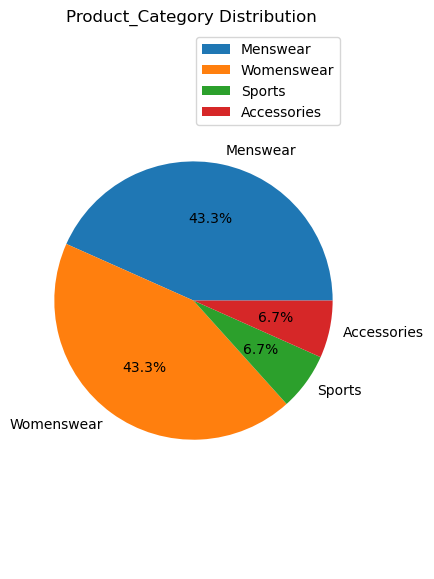

In [12]:
# Plotting a pie chart of the counts of the product category in the dataset
Product_cat_counts = df["Product_Category"].value_counts()
plt.figure(figsize = (4, 7))
plt.pie(Product_cat_counts, labels = Product_cat_counts.index, autopct = '%1.1f%%')
plt.title('Product_Category Distribution')
plt.axis('equal')
plt.legend()
plt.show

In [13]:
# determining which region have the highest sales or generated the highest sale revenue.
total_products = df.groupby('Region')['Sales_Revenue'].sum().reset_index()
total_products.sort_values(by='Sales_Revenue', ascending = False)

,Region,Sales_Revenue
1,Wakefield,828.926700
0,Truro,404.433414
2,Wells,330.165352
5,York,309.757378
3,Winchester,302.070136
4,Worcester,215.285596


<function matplotlib.pyplot.show(close=None, block=None)>

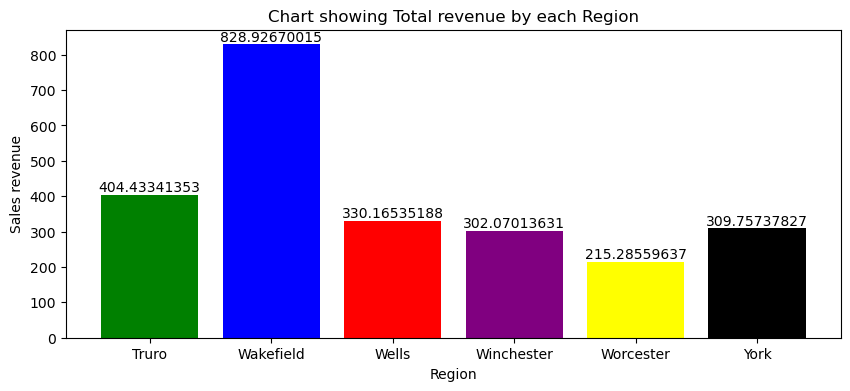

In [14]:
# plotting a bar chart to show the total sales revenue for each region
plt.figure(figsize = (10,4))
plt.bar(total_products['Region'],total_products['Sales_Revenue'], color = ['green', 'blue', 'red', 'purple','yellow', 'black'])
for index, value in enumerate(total_products['Sales_Revenue']):
    plt.text(index, value, str(value), ha= 'center', va='bottom')
    
plt.xlabel('Region')
plt.ylabel('Sales revenue')
plt.title('Chart showing Total revenue by each Region')
plt.show

In [15]:
# What is the trend of sales for product Line over time
product_sale_by_Year = df.groupby(['Product_Line', 'Year'])['Sales_Revenue'].sum().reset_index()
product_sale_by_Year.sort_values(by='Sales_Revenue', ascending = False)

,Product_Line,Year,Sales_Revenue
2,Tops,1970,1874.670201
3,Trousers,1970,344.339991
0,Leathers,1970,149.662573
1,Shoes,1970,21.965812


In [16]:
pivottable = product_sale_by_Year.pivot(index = 'Product_Line', columns = 'Year', values = 'Sales_Revenue').fillna(0)
pivottable

Year,1970
Product_Line,
Leathers,149.662573
Shoes,21.965812
Tops,1874.670201
Trousers,344.339991


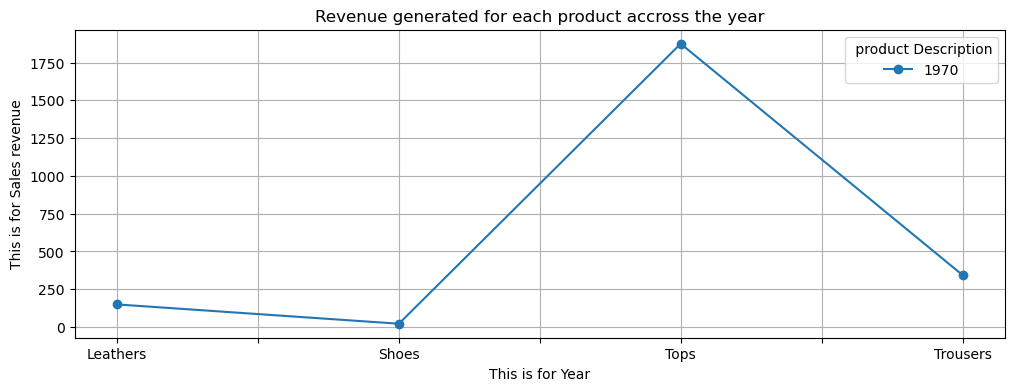

In [17]:
# Generating a graph showing the trend of sales over time for the product line in the dataset
pivottable.plot(kind = 'line', marker = 'o', figsize = (12,4))
plt.xlabel('This is for Year')
plt.ylabel('This is for Sales revenue')
plt.title('Revenue generated for each product accross the year')
plt.legend(title = ' product Description')
plt.grid(True)
plt.show()

In [18]:
df.head()

,Date,Customer_ID,Product_ID,Quantity,Unit_Price,Sales_Revenue,Product_Description,Product_Category,Product_Line,Raw_Material,Region,Latitude,Longitude,Year,Month,Day
0,1970-01-01 00:00:00.020210601,98,321,1,117.306016,117.306016,Cycling Jerseys,Sports,Tops,Fabrics,York,53.958332,-1.080278,1970,January,Thursday
1,1970-01-01 00:00:00.020210602,92,261,4,32.272403,129.089613,Casual Shirts,Menswear,Tops,Cotton,Worcester,52.192001,-2.220000,1970,January,Thursday
2,1970-01-01 00:00:00.020210603,92,264,1,36.193364,36.193364,Casual Shirts,Menswear,Tops,Cotton,Worcester,52.192001,-2.220000,1970,January,Thursday
3,1970-01-01 00:00:00.020210604,99,251,3,29.913403,89.740210,Jeans,Menswear,Trousers,Cotton,Winchester,51.063202,-1.308000,1970,January,Thursday
4,1970-01-01 00:00:00.020210605,66,251,1,41.843430,41.843430,Shorts,Womenswear,Trousers,Cotton,Winchester,51.063202,-1.308000,1970,January,Thursday


In [19]:
Quantity_counts = df["Quantity"].value_counts()
Quantity_counts

1    14
3     8
4     4
2     4
Name: Quantity, dtype: int64

In [20]:
total_Qty_Bought = df.groupby('Product_Description')['Quantity'].sum().reset_index()
total_Qty_Bought.sort_values(by='Quantity', ascending = False)

,Product_Description,Quantity
5,Formal Shirts,9
8,Knitwear,6
9,Pants,5
1,Casual Shirts,5
12,Shorts,5
13,Suits,4
11,Pyjamas,4
10,Polo Shirts,4
16,Tshirts,3
0,Belts,3


<function matplotlib.pyplot.show(close=None, block=None)>

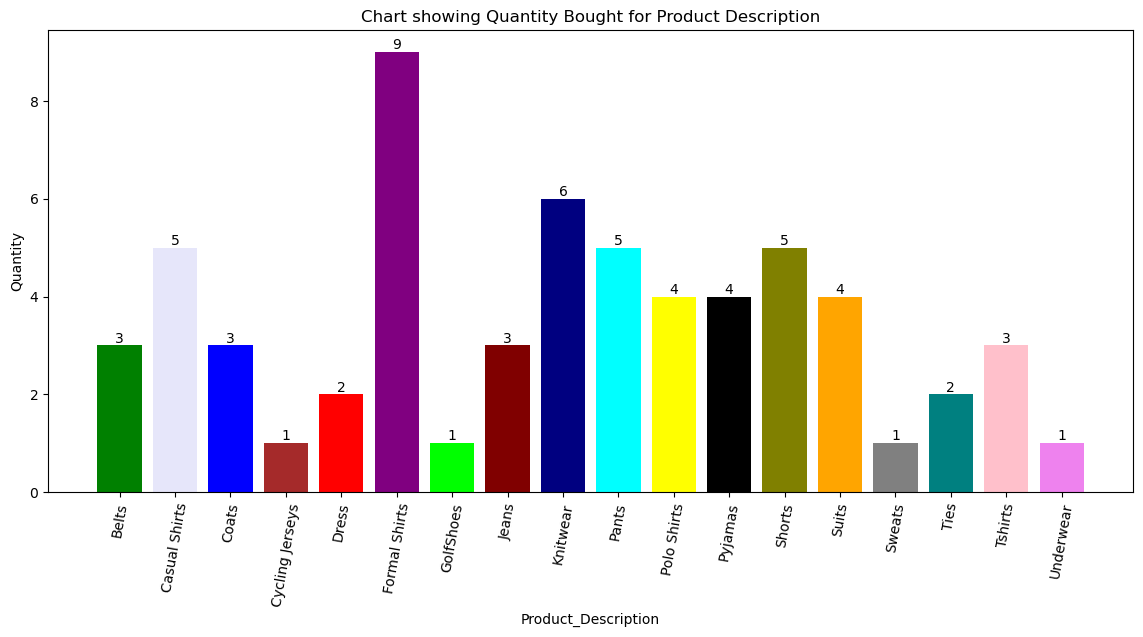

In [21]:
plt.figure(figsize = (14,6))
plt.bar(total_Qty_Bought['Product_Description'],total_Qty_Bought['Quantity'], color = ['green', 'lavender', 
'blue', 'brown', 'red', 'purple', 'lime', 'maroon', 'navy', 'cyan', 'yellow', 'black', 'olive', 'orange',
'gray', 'teal', 'pink', 'violet'])
for index, value in enumerate(total_Qty_Bought['Quantity']):
    plt.text(index, value, str(value), ha= 'center', va='bottom')
    
plt.xlabel('Product_Description')
plt.ylabel('Quantity')
plt.title('Chart showing Quantity Bought for Product Description')
plt.xticks(rotation=80)
plt.show

In [22]:
df.head()

,Date,Customer_ID,Product_ID,Quantity,Unit_Price,Sales_Revenue,Product_Description,Product_Category,Product_Line,Raw_Material,Region,Latitude,Longitude,Year,Month,Day
0,1970-01-01 00:00:00.020210601,98,321,1,117.306016,117.306016,Cycling Jerseys,Sports,Tops,Fabrics,York,53.958332,-1.080278,1970,January,Thursday
1,1970-01-01 00:00:00.020210602,92,261,4,32.272403,129.089613,Casual Shirts,Menswear,Tops,Cotton,Worcester,52.192001,-2.220000,1970,January,Thursday
2,1970-01-01 00:00:00.020210603,92,264,1,36.193364,36.193364,Casual Shirts,Menswear,Tops,Cotton,Worcester,52.192001,-2.220000,1970,January,Thursday
3,1970-01-01 00:00:00.020210604,99,251,3,29.913403,89.740210,Jeans,Menswear,Trousers,Cotton,Winchester,51.063202,-1.308000,1970,January,Thursday
4,1970-01-01 00:00:00.020210605,66,251,1,41.843430,41.843430,Shorts,Womenswear,Trousers,Cotton,Winchester,51.063202,-1.308000,1970,January,Thursday


In [23]:
# Customer Behavior
CustID_Purchase_counts = df["Customer_ID"].value_counts()
CustID_Purchase_counts

47    3
98    2
66    2
97    2
45    2
92    2
90    1
13    1
56    1
15    1
32    1
89    1
9     1
12    1
44    1
34    1
31    1
55    1
10    1
24    1
81    1
99    1
91    1
Name: Customer_ID, dtype: int64

In [24]:
df.head()

,Date,Customer_ID,Product_ID,Quantity,Unit_Price,Sales_Revenue,Product_Description,Product_Category,Product_Line,Raw_Material,Region,Latitude,Longitude,Year,Month,Day
0,1970-01-01 00:00:00.020210601,98,321,1,117.306016,117.306016,Cycling Jerseys,Sports,Tops,Fabrics,York,53.958332,-1.080278,1970,January,Thursday
1,1970-01-01 00:00:00.020210602,92,261,4,32.272403,129.089613,Casual Shirts,Menswear,Tops,Cotton,Worcester,52.192001,-2.220000,1970,January,Thursday
2,1970-01-01 00:00:00.020210603,92,264,1,36.193364,36.193364,Casual Shirts,Menswear,Tops,Cotton,Worcester,52.192001,-2.220000,1970,January,Thursday
3,1970-01-01 00:00:00.020210604,99,251,3,29.913403,89.740210,Jeans,Menswear,Trousers,Cotton,Winchester,51.063202,-1.308000,1970,January,Thursday
4,1970-01-01 00:00:00.020210605,66,251,1,41.843430,41.843430,Shorts,Womenswear,Trousers,Cotton,Winchester,51.063202,-1.308000,1970,January,Thursday


In [25]:
# Find out which Product_ID or Product_Category sold the most in the dataset
product_Performance = df.groupby(['Product_ID', 'Product_Category'])['Unit_Price'].sum().reset_index()
product_Performance.sort_values(by='Unit_Price', ascending = False)

,Product_ID,Product_Category,Unit_Price
22,321,Sports,117.306016
12,276,Womenswear,88.926080
9,265,Menswear,70.920493
19,291,Menswear,66.671559
3,260,Menswear,63.283812
17,286,Womenswear,59.774078
11,274,Womenswear,51.968244
13,277,Womenswear,50.795957
18,288,Menswear,50.002619
21,304,Accessories,49.887524


In [26]:
pivot_Product_perf_sale = product_Performance.pivot(index="Product_ID", columns="Product_Category", values='Unit_Price').fillna(0)
pivot_Product_perf_sale

Product_Category,Accessories,Menswear,Sports,Womenswear
Product_ID,,,,
251,0.000000,29.913403,0.000000,41.843430
258,0.000000,29.084205,0.000000,0.000000
260,0.000000,63.283812,0.000000,44.498077
261,0.000000,32.272403,0.000000,0.000000
262,0.000000,33.470936,0.000000,0.000000
263,0.000000,0.000000,0.000000,38.497397
264,0.000000,36.193364,0.000000,0.000000
265,0.000000,70.920493,0.000000,0.000000
273,0.000000,0.000000,0.000000,38.516218


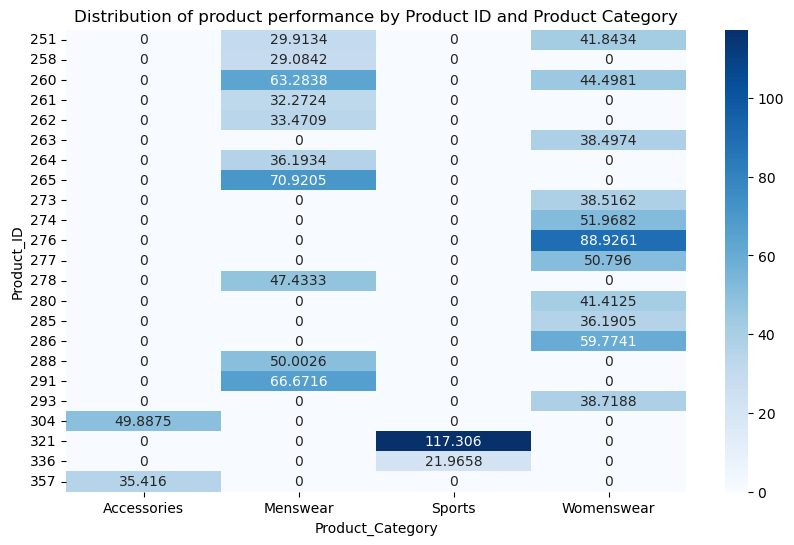

In [31]:
# Plotting the graph of the product performance
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_Product_perf_sale, annot=True, cmap='Blues', fmt='g')
plt.title('Distribution of product performance by Product ID and Product Category')
plt.xlabel('Product_Category')
plt.ylabel('Product_ID')
plt.show()